In [1]:
import pandas as pd
import requests
import json
from scipy.optimize import fsolve
from Mercados import Mercado,npv,irr,Bono
from MarketData import MarketDataAPI as MD
#importData,get_instrumentos,get_value,get_operaciones,get_flujos
from datetime import datetime,timedelta,date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
isin='PYTEL03F9370'
flujos=MD.get_flujos(isin)
bono=Bono(isin,flujos)
fecha_cotizacion=datetime(2021,9,5)
op=MD.get_operaciones(isin)
op=op[~(op.mercado=='Repos')]
mercado=Mercado(flujos,op)

Instumentos cargados
Operaciones cargadas


C:\Users\g_sau\OneDrive\Documentos\GitHub\PortafolioManager\Mercados.py:310: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  self.instrumentos=pd.DataFrame(index=flujos.pivot_table(index='isin').index)


In [3]:
historia=mercado.history_pClean(isin)

C:\Users\g_sau\OneDrive\Documentos\GitHub\PortafolioManager\Mercados.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dias']=((df['fecha']-fechaValor)/timedelta(days=1)).astype(int)
C:\Users\g_sau\OneDrive\Documentos\GitHub\PortafolioManager\Mercados.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dias']=((df['fecha']-fechaValor)/timedelta(days=1)).astype(int)
C:\Users\g_sau\OneDrive\Documentos\GitHub\PortafolioManager\Mercados.py:82: SettingWithCopyWarning: 
A value is trying to be set on 

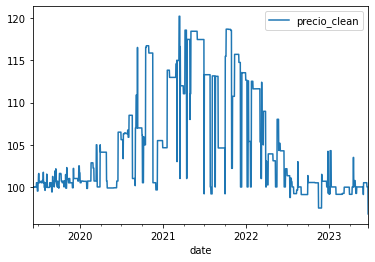

date            datetime64[ns]
precio_clean           float64
dtype: object

In [4]:
historia.plot(x="date", y='precio_clean')
plt.show()
historia.dtypes

In [13]:
op[op['fecha_operacion'].isin(historia['date'])]

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [9]:
historia['date']

0      2019-06-10
1      2019-06-11
2      2019-06-12
3      2019-06-13
4      2019-06-14
          ...    
1468   2023-06-17
1469   2023-06-18
1470   2023-06-19
1471   2023-06-20
1472   2023-06-21
Name: date, Length: 1473, dtype: datetime64[ns]

In [144]:
mercado.instrumentos.loc[isin,'bono'].valorNominalUnitario(fecha_cotizacion)

1000.0